### Select the Right Threshold values using ROC Curve

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification




In [3]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [4]:
X.shape

(2000, 20)

In [5]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### Random Forests

In [12]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9845444444444444


In [13]:
ytrain_pred

array([[0.99, 0.01],
       [0.95, 0.05],
       [0.03, 0.97],
       ...,
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.32, 0.68]])

#### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


#### Adaboost Classifier

In [15]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


#### KNNClassifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


#### No we will focus on selecting the best threshold for maximum accuracy

In [17]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9854222222222222


In [18]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.97,0.991861,0.559186,1.0
1,0.02,0.000008,0.463282,0.0
2,0.97,0.966929,0.538202,0.8
3,0.95,0.761539,0.509875,0.8
4,0.62,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.04,0.000003,0.441377,0.0
597,0.98,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [19]:
final_prediction

0      0.880262
1      0.120823
2      0.818783
3      0.755353
4      0.572447
         ...   
595    0.121340
596    0.120345
597    0.874197
598    0.163217
599    0.834857
Length: 600, dtype: float64

In [20]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.91077475, 0.81126012, 0.8080558 ,
       0.79452438, 0.79412833, 0.77191919, 0.77037124, 0.76724465,
       0.76571156, 0.73157482, 0.73137362, 0.71208108, 0.70893711,
       0.66287883, 0.66243537, 0.60462652, 0.60114346, 0.58649047,
       0.58486186, 0.57156376, 0.57050386, 0.56042732, 0.55969563,
       0.54345371, 0.53889283, 0.53865858, 0.53127948, 0.50355932,
       0.48616892, 0.45169266, 0.43222765, 0.4296034 , 0.39318654,
       0.38879719, 0.35995613, 0.35836612, 0.23969741, 0.23890421,
       0.21854662, 0.21848417, 0.12551207, 0.1253351 , 0.10498954])

In [21]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
32,0.432228,0.960000
31,0.451693,0.960000
33,0.429603,0.958333
30,0.486169,0.958333
28,0.531279,0.958333


In [22]:
accuracy_ls

,thresholds,accuracy
32,0.432228,0.960000
31,0.451693,0.960000
33,0.429603,0.958333
30,0.486169,0.958333
28,0.531279,0.958333
26,0.538893,0.958333
22,0.570504,0.956667
29,0.503559,0.956667
27,0.538659,0.956667
25,0.543454,0.956667


In [23]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

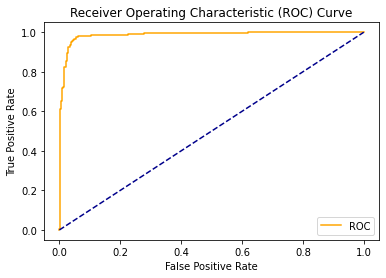

In [24]:
plot_roc_curve(fpr,tpr)